# Midterm 1

**This is a practice exam, but all references to the midterm below will be as if it were the real thing**

Below is Midterm 1.

Your acknowledgement of the honor code in Sakai applies to this notebook.

This is an *individual assessment* that you will do while supervised in class. This document and your answers are for your eyes only.

This exam is open book, open note, open Internet, and closed to people. This means you cannot communicate with a person while taking the exam, including asking someone through the Internet  (like stackoverflow) for help and receiving help.

In [47]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Don't change this cell; just run it. 
from gofer.ok import check

from tests import tables_are_same

# Data Set: NBA

Run the cell below to load NBA player stats and salary information.

The data from "player_data.csv" is information about each player's game statistics

The data from "salary_data.csv" includes each player's name and his salary.

In [48]:
player_stats = Table.read_table("player_data.csv")
player_salaries = Table.read_table("salary_data.csv")
player_stats.show(3)
player_salaries.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


### 1. Make a Full Data Table
Using the two tables `player_stats` and `player_salaries` create `player_full` by joining the two tables using the player name.

In [49]:
player_full = player_stats.join('Name', player_salaries, 'PlayerName')
player_full.num_rows

492

In [50]:
# Run this cell to check your answer
check('tests/q1.py')

### 2. Filter out only those players on the Los Angeles Clippers
Create a new table called `clippers_players` from the `player_full` table that only has players from the LAC team.

In [51]:
clippers_players = player_full.where('Team', are.equal_to('LAC'))
clippers_players

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
Blake Griffin,25,LAC,67,508,354,63,35,152,1469,17674613
C.J. Wilcox,24,LAC,21,7,8,3,1,10,41,1109760
Chris Douglas-Roberts,28,LAC,12,12,4,1,0,0,19,948163
Chris Paul,29,LAC,82,376,838,156,15,190,1564,20068563
Dahntay Jones,34,LAC,33,11,2,3,0,1,21,613478
DeAndre Jordan,26,LAC,82,1226,61,81,183,109,946,11440124
Ekpe Udoh,27,LAC,33,26,8,8,7,7,29,981084
Glen Davis,29,LAC,74,169,39,41,21,39,294,6600000
Hedo Turkoglu,35,LAC,62,99,37,19,7,29,232,1448490
J.J. Redick,30,LAC,78,167,137,39,8,95,1277,6792500


In [52]:
# Run, but do not change this cell
q2_ans = clippers_players

In [53]:
# Run this cell to check your answer
check('tests/q2.py')

### 3. Add an extra column with the players salary in millions of dollars
Add a column called `Salary in Mln USD` to the `clippers_players` table

In [54]:
def in_mln(amount):
    return amount / 1e6

clippers_players = clippers_players.with_column('Salary in 10^6', clippers_players.apply(in_mln, 'Salary'))

In [55]:
# Run, but do not change this cell
q3_ans = clippers_players

In [56]:
# Run this cell to check your answer
check('tests/q3.py')

### 4. Make a histogram of the data
Create a histogram where the bins are each $1 million up to $5,000,000 and then are in increments of $5,000,000 after that. 
Make sure to check what the largest salary is to know how far the bins should go.

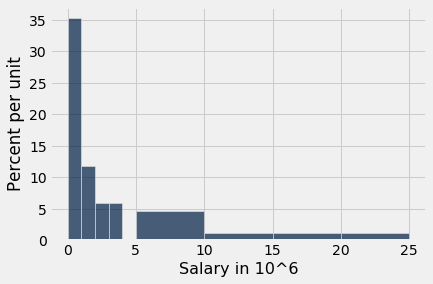

In [57]:
bins = [0, 1, 2, 3, 4, 5, 10, 15, 20, 25]
clippers_players.hist('Salary in 10^6', bins=bins)

### 5. Analyze the histogram
In the space below, explain which bar in the histogram has the most players in it and why.

*(Fill out your answer here)*

### 6. Using pivot tables
Add a new column called `Age Decade` that truncates each player's `Age` column to the decade digit by using floor division `//`. 


In [58]:
# This cell is to demonstrate floor division
# Just run it, don't worry about understanding it now.
print(f'4 // 2 = {4 // 2}')
print(f'50 // 3 = {50 // 3}')
print(f'8 // 5 = {8 // 5}')

4 // 2 = 2
50 // 3 = 16
8 // 5 = 1


Create a pivot table where the first column is the `Team`, the rest is from `Age Decade`, and the values in the table are the average salary.
You must use the table with all the players (`player_full`), not only the clippers for this question

In [59]:
salary_per_decade_table = player_full.with_column('Age Decade', player_full['Age']//10)
pivot_table = salary_per_decade_table.pivot('Age Decade', 'Team', 'Salary', np.average)
pivot_table

Team,1,2,3
ATL,0,4.35292e+06,3.41338e+06
BOS,1.67448e+06,3.33411e+06,1.01059e+07
BRK,0,2.79513e+06,1.07675e+07
CHI,0,5.78694e+06,3.15608e+06
CHO,2.5242e+06,4.299e+06,5.47732e+06
CLE,0,4.37775e+06,6.36528e+06
DAL,0,5.2048e+06,4.93740e+06
DEN,0,4.18543e+06,3.135e+06
DET,0,4.25346e+06,2.44566e+06
GSW,0,2.79013e+06,1.04308e+07


In [60]:
# Run this cell to check your results!
check('tests/q6.py')